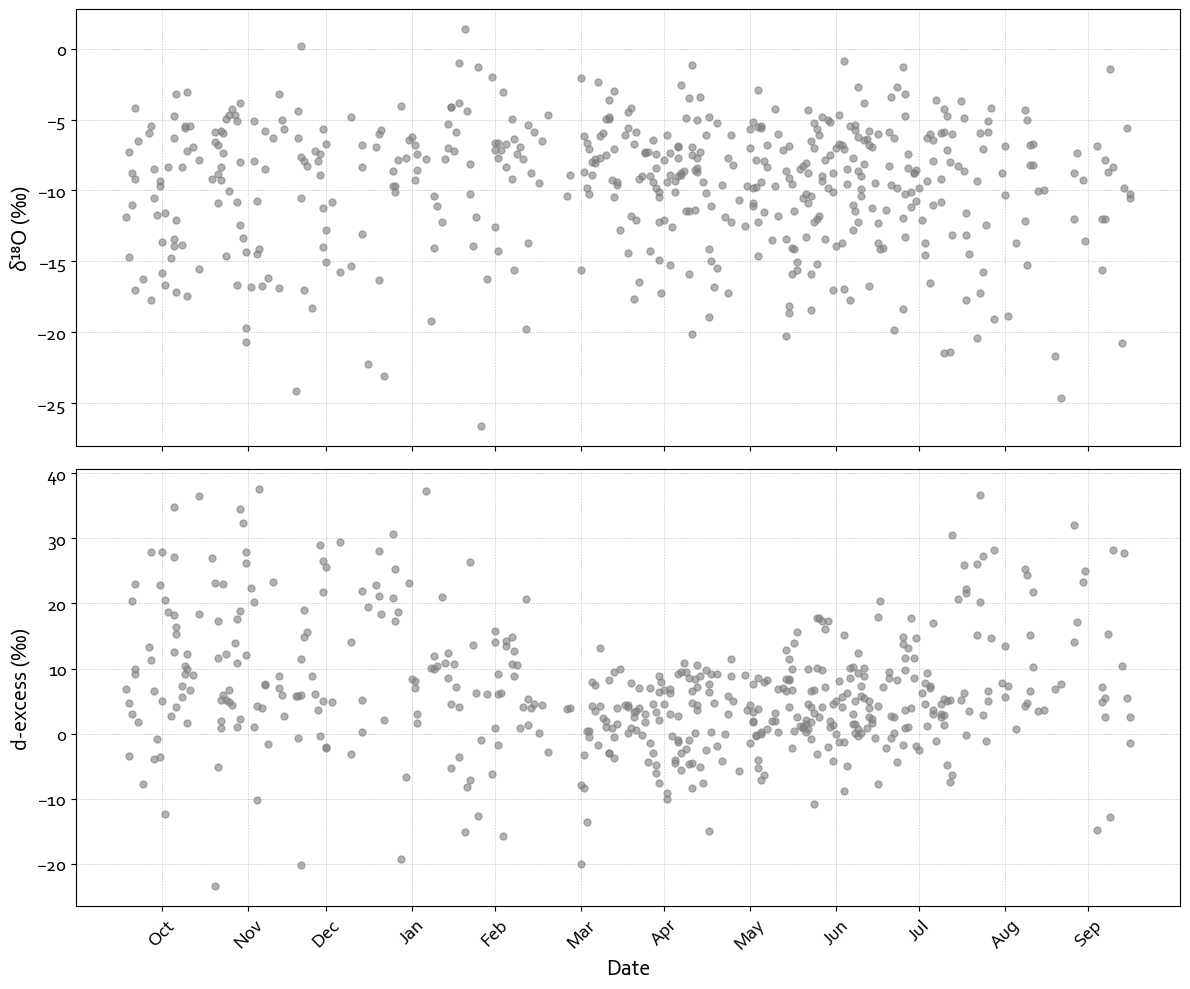

In [23]:
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import calendar
import matplotlib

# Set the font to Corbel
matplotlib.rcParams['font.family'] = 'Corbel'

# Function to convert Matlab date format to datetime
def matlab_to_datetime(matlab_date):
    return datetime.fromordinal(int(matlab_date)) + timedelta(days=matlab_date % 1) - timedelta(days=366)

# Function to normalize year
def normalize_year(date):
    return date.replace(year=2019)

# Read the data
file_path = r"C:\CiASOM\Data\Vapor Svalbard\CLDS_2020_iso_precip.dat"
precip_data = pd.read_csv(file_path, delim_whitespace=True, header=None, 
                          names=['Date', 'Temperature_C', 'd18O', 'dD', 'PrecipType'])

# Convert Matlab date format to datetime and normalize year
precip_data['Date'] = precip_data['Date'].apply(matlab_to_datetime).apply(normalize_year)
precip_data['Month'] = precip_data['Date'].dt.month

# Calculate d-excess
precip_data['d_excess'] = precip_data['dD'] - 8 * precip_data['d18O']

# Filter out points where d18O > 3 and d-excess < -25
precip_data = precip_data[(precip_data['d18O'] <= 3) & (precip_data['d_excess'] >= -25)]

# Normalize the month and year for plotting
precip_data['Normalized_Date'] = precip_data['Date'].apply(lambda x: x.replace(year=2019))

# Create the subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Plot δ¹⁸O values and d-excess values
for month in range(1, 13):
    monthly_data = precip_data[precip_data['Month'] == month]
    ax1.plot(monthly_data['Normalized_Date'], monthly_data['d18O'], marker='o', markersize=5, linestyle='', color='grey', alpha=0.6)
    ax2.plot(monthly_data['Normalized_Date'], monthly_data['d_excess'], marker='o', markersize=5, linestyle='', color='grey', alpha=0.6)

# Set labels and titles
ax1.set_ylabel("δ¹⁸O (‰)", fontsize=16)
ax2.set_ylabel("d-excess (‰)", fontsize=16)
ax2.set_xlabel("Date", fontsize=16)

# Customize x-axis with month names and locations
x_ticks = [datetime(2019, month, 15) for month in range(1, 13)]
x_labels = [calendar.month_abbr[month] for month in range(10, 13)] + [calendar.month_abbr[month] for month in range(1, 10)]

ax2.set_xticks(x_ticks)
ax2.set_xticklabels(x_labels, rotation=45, fontsize=14)

# Set the size of the y-axis tick labels
ax1.tick_params(axis='y', labelsize=14)
ax2.tick_params(axis='y', labelsize=14)

# Add grid lines with specified properties
for ax in [ax1, ax2]:
    ax.grid(True, which='both', linestyle='--', linewidth=0.4, color='grey', alpha=0.5)

plt.tight_layout()
plt.show()

In [29]:
import pandas as pd
from datetime import datetime, timedelta

# Function to convert Matlab date format to datetime
def matlab_to_datetime(matlab_date):
    return datetime.fromordinal(int(matlab_date)) + timedelta(days=matlab_date % 1) - timedelta(days=366)

# Function to adjust year based on month
def adjust_year(date):
    if 10 <= date.month <= 12:
        return date.replace(year=2019)
    else:
        return date.replace(year=2020)

# Read the data
file_path = r"C:\CiASOM\Data\Vapor Svalbard\CLDS_2020_iso_precip.dat"
precip_data = pd.read_csv(file_path, delim_whitespace=True, header=None, 
                          names=['Date', 'Temperature_C', 'd18O', 'dD', 'PrecipType'])

# Convert Matlab date format to datetime
precip_data['Date'] = precip_data['Date'].apply(matlab_to_datetime)

# Adjust the years in the dates
precip_data['Date'] = precip_data['Date'].apply(adjust_year)

# Save the data in a new xlsx file
new_file_path = r"C:\CiASOM\Data\Vapor Svalbard\Samoyov_Precip_longterm.xlsx"
precip_data.to_excel(new_file_path, index=False)

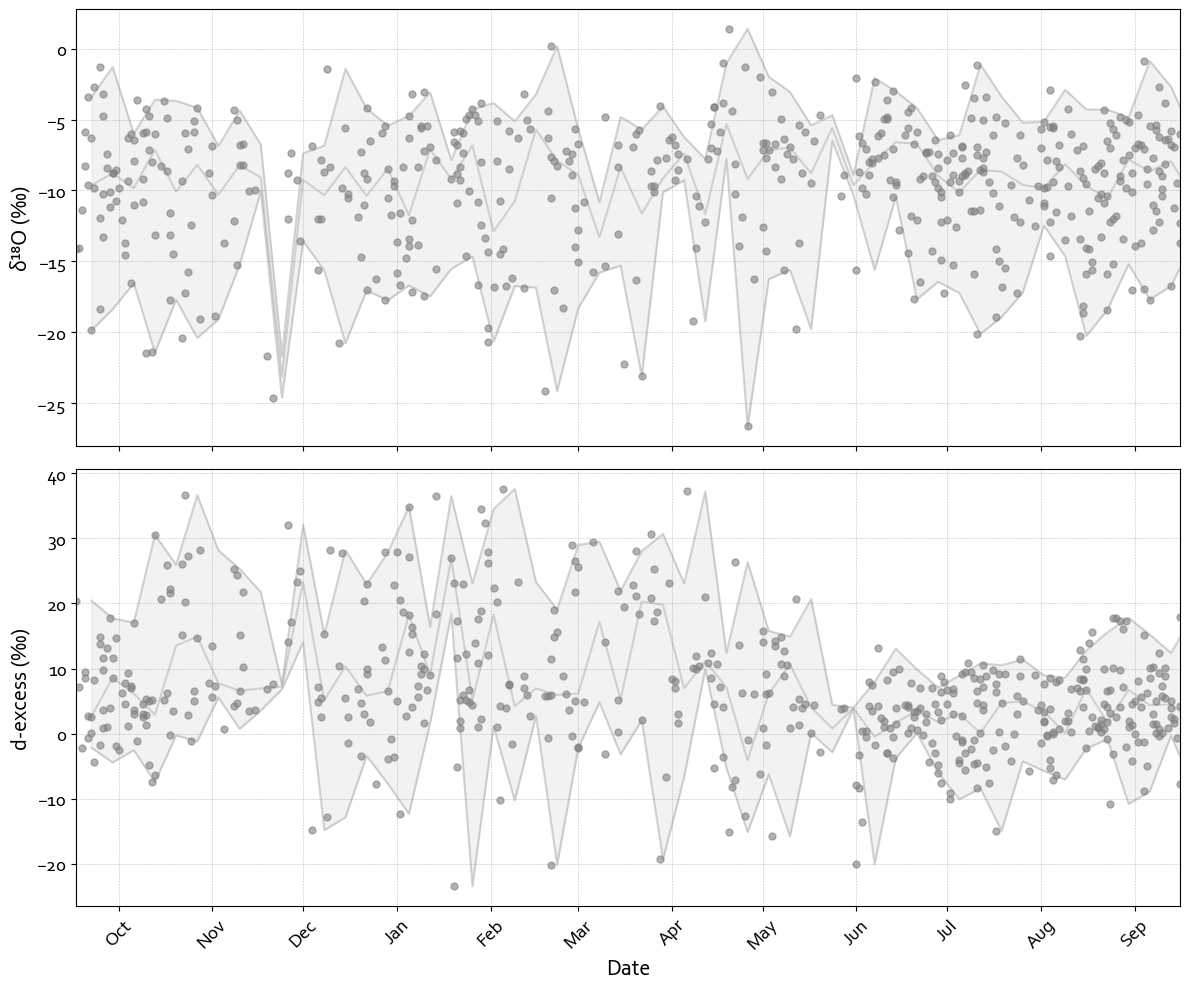

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

# Set the font to Corbel
matplotlib.rcParams['font.family'] = 'Corbel'

# Load the data
file_path = "C:\\CiASOM\\Data\\Vapor Svalbard\\Samoyov_Precip_longterm.xlsx"
data = pd.read_excel(file_path)

# Ensure that 'Date' is a datetime object
data['Date'] = pd.to_datetime(data['Date'])

# Filter out points where d18O > 3 and d-excess < -25
data = data[(data['d18O'] <= 3) & (data['d-excess'] >= -25)]

# Filter the data for the date range
start_date = pd.to_datetime("2019-10-01")
end_date = pd.to_datetime("2020-09-30")
data = data[(data['Date'] >= start_date) & (data['Date'] <= end_date)]

# Resample data to weekly frequency and calculate min, max, and median
weekly_data = data.set_index('Date').resample('W').agg({'d18O': ['min', 'max', 'median'], 'd-excess': ['min', 'max', 'median']})

# Create the subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Plot d18O data and weekly stats
ax1.plot(data['Date'], data['d18O'], marker='o', markersize=5, linestyle='', color='grey', alpha=0.6)
ax1.plot(weekly_data.index, weekly_data['d18O']['min'], color='grey', alpha=0.3)
ax1.plot(weekly_data.index, weekly_data['d18O']['max'], color='grey', alpha=0.3)
ax1.plot(weekly_data.index, weekly_data['d18O']['median'], color='grey', alpha=0.3)
ax1.fill_between(weekly_data.index, weekly_data['d18O']['min'], weekly_data['d18O']['max'], color='grey', alpha=0.1)
ax1.set_ylabel('δ¹⁸O (‰)', fontsize=16)
ax1.tick_params(axis='y', labelsize=14)

# Plot d-excess data and weekly stats
ax2.plot(data['Date'], data['d-excess'], marker='o', markersize=5, linestyle='', color='grey', alpha=0.6)
ax2.plot(weekly_data.index, weekly_data['d-excess']['min'], color='grey', alpha=0.3)
ax2.plot(weekly_data.index, weekly_data['d-excess']['max'], color='grey', alpha=0.3)
ax2.plot(weekly_data.index, weekly_data['d-excess']['median'], color='grey', alpha=0.3)
ax2.fill_between(weekly_data.index, weekly_data['d-excess']['min'], weekly_data['d-excess']['max'], color='grey', alpha=0.1)
ax2.set_ylabel('d-excess (‰)', fontsize=16)
ax2.tick_params(axis='y', labelsize=14)

# Add grid lines with specified properties
for ax in [ax1, ax2]:
    ax.grid(True, which='both', linestyle='--', linewidth=0.4, color='grey', alpha=0.5)

# Set x-axis limits, labels, and title
ax2.set_xlim(start_date, end_date)
x_ticks = pd.date_range(start_date, end_date, freq='MS') + pd.Timedelta(days=14)
month_labels = ["Oct", "Nov", "Dec", "Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep"]
ax2.set_xticks(x_ticks)
ax2.set_xticklabels(month_labels, rotation=45, fontsize=14)
ax2.set_xlabel('Date', fontsize=16)

plt.tight_layout()
plt.show()

In [42]:
import pandas as pd

# Function to adjust year based on month
def adjust_year(date):
    if 10 <= date.month <= 12:
        return date.replace(year=2019)
    else:
        return date.replace(year=2020)

# Load the data
file_path = "C:\\CiASOM\\PhD\\07.Manuscripts\\#2.Snow Surface\\Precipitation_PAPIN\\CiASOM_Comparison\\Samoylov_fouryear_precip.xlsx"
data = pd.read_excel(file_path)

# Ensure that 'Date' is a datetime object
data['Date'] = pd.to_datetime(data['Date'])

# Apply the function to adjust the year
data['Date'] = data['Date'].apply(adjust_year)

# Save the modified data
new_file_path = "C:\\CiASOM\\PhD\\07.Manuscripts\\#2.Snow Surface\\Precipitation_PAPIN\\CiASOM_Comparison\\Samoylov_fouryear_precip_201920.xlsx"
data.to_excel(new_file_path, index=False)

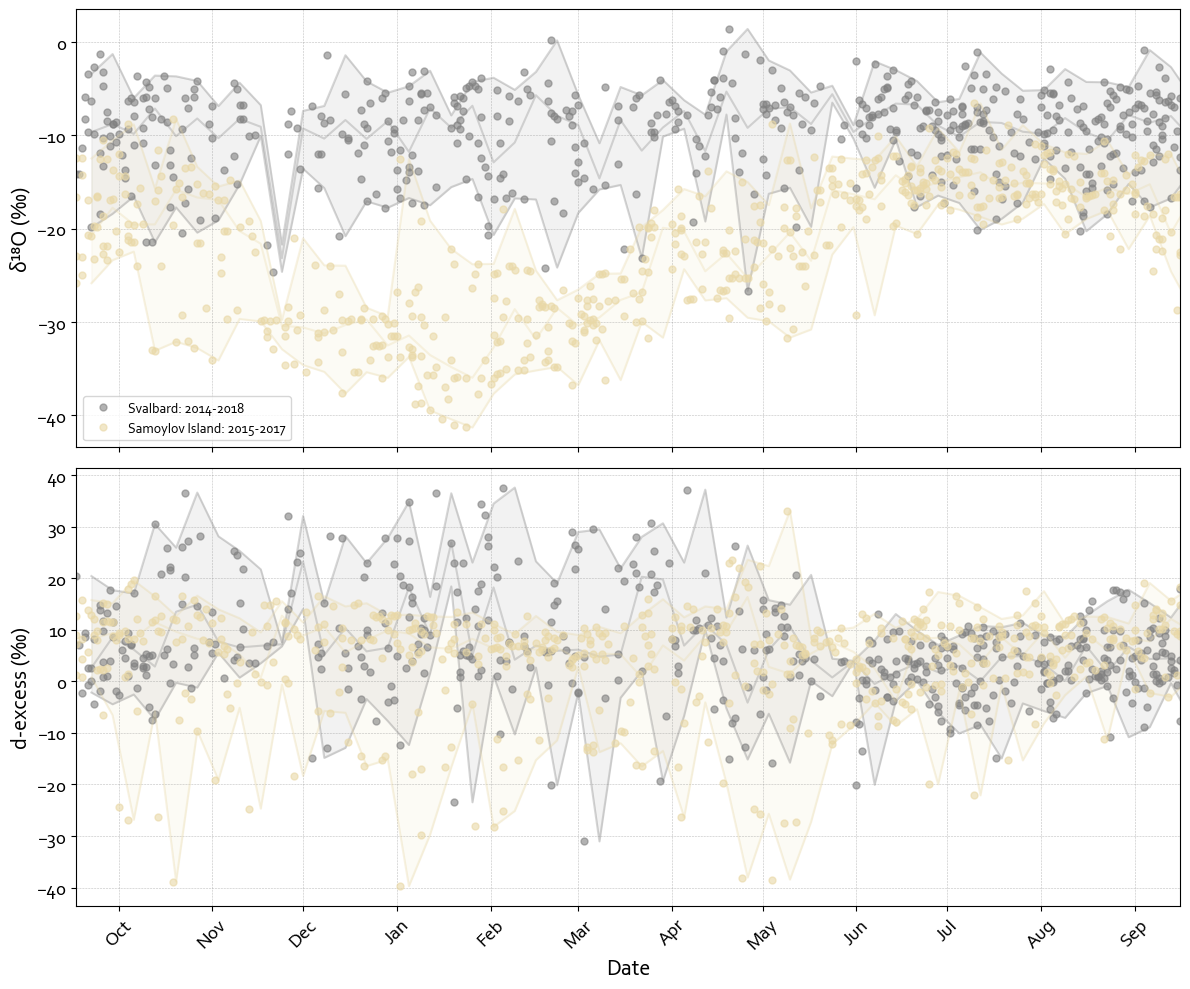

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

# Set the font to Corbel
matplotlib.rcParams['font.family'] = 'Corbel'

# Load the data from both files
file_path = "C:\\CiASOM\\Data\\Vapor Svalbard\\Svalbard_Precip_longterm.xlsx"
data = pd.read_excel(file_path)

file_path_1 = "C:\\CiASOM\\PhD\\07.Manuscripts\\#2.Snow Surface\\Precipitation_PAPIN\\CiASOM_Comparison\\Samoylov_fouryear_precip_201920.xlsx"
data_1 = pd.read_excel(file_path_1)

# Ensure that 'Date' is a datetime object for both datasets
data['Date'] = pd.to_datetime(data['Date'])
data_1['Date'] = pd.to_datetime(data_1['Date'])

# Filter out points where d18O > 3 and d-excess < -25 for the first dataset
data = data[(data['d18O'] <= 3) & (data['d-excess'] >= -40)]

# Filter the data for the date range for both datasets
start_date = pd.to_datetime("2019-10-01")
end_date = pd.to_datetime("2020-09-30")
data = data[(data['Date'] >= start_date) & (data['Date'] <= end_date)]
data_1 = data_1[(data_1['Date'] >= start_date) & (data_1['Date'] <= end_date)]

# Filter data_1 to remove points with d-excess lower than -40
data_1 = data_1[(data_1['d-excess'] >= -40) & (data_1['Date'] >= start_date) & (data_1['Date'] <= end_date)]

# Resample data to weekly frequency and calculate min, max, and median for both datasets
weekly_data = data.set_index('Date').resample('W').agg({'d18O': ['min', 'max', 'median'], 'd-excess': ['min', 'max', 'median']})
weekly_data_1 = data_1.set_index('Date').resample('W').agg({'d18O': ['min', 'max', 'median'], 'd-excess': ['min', 'max', 'median']})

# Create the subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Plot d18O data and weekly stats for data
ax1.plot(data['Date'], data['d18O'], marker='o', markersize=5, linestyle='', color='grey', alpha=0.6, label='Svalbard: 2014-2018')
ax1.plot(weekly_data.index, weekly_data['d18O']['min'], color='grey', alpha=0.3)
ax1.plot(weekly_data.index, weekly_data['d18O']['max'], color='grey', alpha=0.3)
ax1.plot(weekly_data.index, weekly_data['d18O']['median'], color='grey', alpha=0.3)
ax1.fill_between(weekly_data.index, weekly_data['d18O']['min'], weekly_data['d18O']['max'], color='grey', alpha=0.1)

# Plot d18O data and weekly stats for data_1
ax1.plot(data_1['Date'], data_1['d18O'], marker='o', markersize=5, linestyle='', color='#E9D8A6', alpha=0.6, label='Samoylov Island: 2015-2017')
ax1.plot(weekly_data_1.index, weekly_data_1['d18O']['min'], color='#E9D8A6', alpha=0.3)
ax1.plot(weekly_data_1.index, weekly_data_1['d18O']['max'], color='#E9D8A6', alpha=0.3)
ax1.plot(weekly_data_1.index, weekly_data_1['d18O']['median'], color='#E9D8A6', alpha=0.3)
ax1.fill_between(weekly_data_1.index, weekly_data_1['d18O']['min'], weekly_data_1['d18O']['max'], color='#E9D8A6', alpha=0.1)

ax1.set_ylabel('δ¹⁸O (‰)', fontsize=16)
ax1.tick_params(axis='y', labelsize=14)

# Plot d-excess data and weekly stats for data
ax2.plot(data['Date'], data['d-excess'], marker='o', markersize=5, linestyle='', color='grey', alpha=0.6)
ax2.plot(weekly_data.index, weekly_data['d-excess']['min'], color='grey', alpha=0.3)
ax2.plot(weekly_data.index, weekly_data['d-excess']['max'], color='grey', alpha=0.3)
ax2.plot(weekly_data.index, weekly_data['d-excess']['median'], color='grey', alpha=0.3)
ax2.fill_between(weekly_data.index, weekly_data['d-excess']['min'], weekly_data['d-excess']['max'], color='grey', alpha=0.1)

# Plot d-excess data and weekly stats for data_1
ax2.plot(data_1['Date'], data_1['d-excess'], marker='o', markersize=5, linestyle='', color='#E9D8A6', alpha=0.6)
ax2.plot(weekly_data_1.index, weekly_data_1['d-excess']['min'], color='#E9D8A6', alpha=0.3)
ax2.plot(weekly_data_1.index, weekly_data_1['d-excess']['max'], color='#E9D8A6', alpha=0.3)
ax2.plot(weekly_data_1.index, weekly_data_1['d-excess']['median'], color='#E9D8A6', alpha=0.3)
ax2.fill_between(weekly_data_1.index, weekly_data_1['d-excess']['min'], weekly_data_1['d-excess']['max'], color='#E9D8A6', alpha=0.1)

# Adding a legend to the upper subplot
ax1.legend(loc='best')

ax1.set_ylabel('δ¹⁸O (‰)', fontsize=16)
ax2.set_ylabel('d-excess (‰)', fontsize=16)
ax1.tick_params(axis='y', labelsize=14)
ax2.tick_params(axis='y', labelsize=14)

# Add grid lines with specified properties
for ax in [ax1, ax2]:
    ax.grid(True, which='both', linestyle='--', linewidth=0.4, color='grey', alpha=0.5)

# Set x-axis limits, labels, and title
ax2.set_xlim(start_date, end_date)
x_ticks = pd.date_range(start_date, end_date, freq='MS') + pd.Timedelta(days=14)
month_labels = ["Oct", "Nov", "Dec", "Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep"]
ax2.set_xticks(x_ticks)
ax2.set_xticklabels(month_labels, rotation=45, fontsize=14)
ax2.set_xlabel('Date', fontsize=16)

plt.tight_layout()
plt.show()

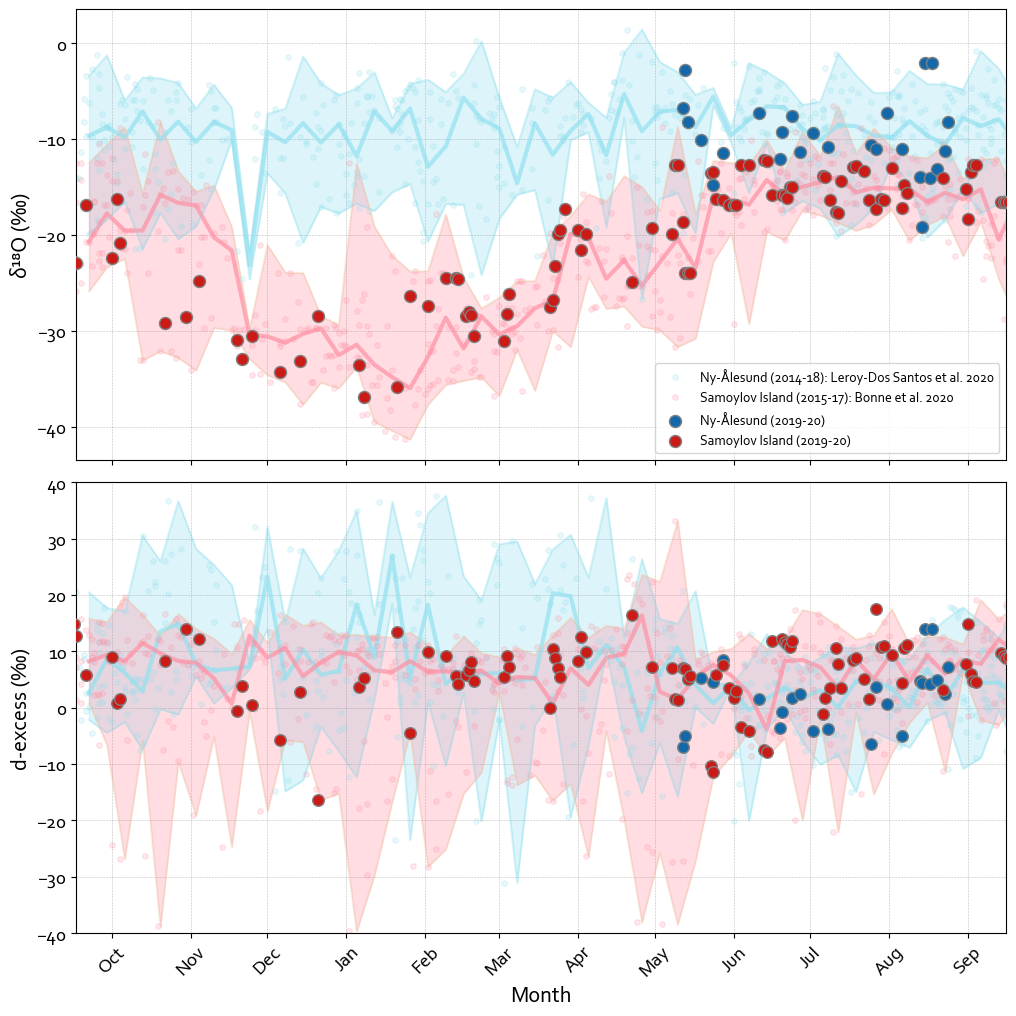

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

# Set the font to Corbel
matplotlib.rcParams['font.family'] = 'Corbel'

# Load the data from both files
file_path = "C:\\CiASOM\\Data\\Vapor Svalbard\\Svalbard_Precip_longterm.xlsx"
data = pd.read_excel(file_path)

file_path_1 = "C:\\CiASOM\\PhD\\07.Manuscripts\\#2.Snow Surface\\Precipitation_PAPIN\\CiASOM_Comparison\\Samoylov_fouryear_precip_201920.xlsx"
data_1 = pd.read_excel(file_path_1)

# Load additional data from the new file
additional_file_path = "C:\\CiASOM\\PhD\\07.Manuscripts\\#2.Snow Surface\\Precipitation_PAPIN\\PAPIN_CiASOM.xlsx"
additional_data = pd.read_excel(additional_file_path, sheet_name=["Ny-Ålesund", "Samoylov"])

# Extract relevant columns for Ny-Ålesund and Samoylov
ny_alesund_data = additional_data["Ny-Ålesund"]
samoylov_data = additional_data["Samoylov"]

# Ensure that 'Date' is a datetime object for both datasets
data['Date'] = pd.to_datetime(data['Date'])
data_1['Date'] = pd.to_datetime(data_1['Date'])
ny_alesund_data['Date'] = pd.to_datetime(ny_alesund_data['Date'])
samoylov_data['Date'] = pd.to_datetime(samoylov_data['Date'])

# Filter out points where d18O > 3 and d-excess < -25 for the first dataset
data = data[(data['d18O'] <= 3) & (data['d-excess'] >= -40)]

# Filter the data for the date range for both datasets
start_date = pd.to_datetime("2019-10-01")
end_date = pd.to_datetime("2020-09-30")
data = data[(data['Date'] >= start_date) & (data['Date'] <= end_date)]
data_1 = data_1[(data_1['Date'] >= start_date) & (data_1['Date'] <= end_date)]

# Filter data_1 to remove points with d-excess lower than -40
data_1 = data_1[(data_1['d-excess'] >= -40) & (data_1['Date'] >= start_date) & (data_1['Date'] <= end_date)]

# Resample data to weekly frequency and calculate min, max, and median for both datasets
weekly_data = data.set_index('Date').resample('W').agg({'d18O': ['min', 'max', 'median'], 'd-excess': ['min', 'max', 'median']})
weekly_data_1 = data_1.set_index('Date').resample('W').agg({'d18O': ['min', 'max', 'median'], 'd-excess': ['min', 'max', 'median']})

# Create the subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12), sharex=True)
plt.subplots_adjust(hspace=0.05)  # Adjust the vertical space (reduce hspace value)

# Add a title to the upper subplot
#ax1.set_title('Precipitation', fontsize=18)  # Add this line to set the title

# Plot d18O data and weekly stats for data
ax1.plot(data['Date'], data['d18O'], marker='o', markersize=4, linestyle='', color='#90E0EF', alpha=0.2, label='Ny-Ålesund (2014-18): Leroy‐Dos Santos et al. 2020')
ax1.plot(weekly_data.index, weekly_data['d18O']['min'], color='#90E0EF', alpha=0.3, zorder=4)
ax1.plot(weekly_data.index, weekly_data['d18O']['max'], color='#90E0EF', alpha=0.3, zorder=4)
ax1.plot(weekly_data.index, weekly_data['d18O']['median'], color='#90E0EF', alpha=0.7, linewidth=3)
ax1.fill_between(weekly_data.index, weekly_data['d18O']['min'], weekly_data['d18O']['max'], color='#90E0EF', alpha=0.3)

# Plot d18O data and weekly stats for data_1
ax1.plot(data_1['Date'], data_1['d18O'], marker='o', markersize=4, linestyle='', color='#FF8FA3', alpha=0.2, label='Samoylov Island (2015-17): Bonne et al. 2020')
ax1.plot(weekly_data_1.index, weekly_data_1['d18O']['min'], color='#E9D8A6', alpha=0.3, zorder=4)
ax1.plot(weekly_data_1.index, weekly_data_1['d18O']['max'], color='#E9D8A6', alpha=0.3, zorder=4)
ax1.plot(weekly_data_1.index, weekly_data_1['d18O']['median'], color='#FF8FA3', alpha=0.7, linewidth=3)
ax1.fill_between(weekly_data_1.index, weekly_data_1['d18O']['min'], weekly_data_1['d18O']['max'], color='#FF8FA3', alpha=0.3)

# Plot d-excess data and weekly stats for data
ax2.plot(data['Date'], data['d-excess'], marker='o', markersize=4, linestyle='', color='#90E0EF', alpha=0.2)
ax2.plot(weekly_data.index, weekly_data['d-excess']['min'], color='#90E0EF', alpha=0.3, zorder=4)
ax2.plot(weekly_data.index, weekly_data['d-excess']['max'], color='#90E0EF', alpha=0.3, zorder=4)
ax2.plot(weekly_data.index, weekly_data['d-excess']['median'], color='#90E0EF', alpha=0.7, linewidth=3)
ax2.fill_between(weekly_data.index, weekly_data['d-excess']['min'], weekly_data['d-excess']['max'], color='#90E0EF', alpha=0.3)

# Plot d-excess data and weekly stats for data_1
ax2.plot(data_1['Date'], data_1['d-excess'], marker='o', markersize=4, linestyle='', color='#FF8FA3', alpha=0.2)
ax2.plot(weekly_data_1.index, weekly_data_1['d-excess']['min'], color='#E9D8A6', alpha=0.3, zorder=4)
ax2.plot(weekly_data_1.index, weekly_data_1['d-excess']['max'], color='#E9D8A6', alpha=0.3, zorder=4)
ax2.plot(weekly_data_1.index, weekly_data_1['d-excess']['median'], color='#FF8FA3', alpha=0.7, linewidth=3)
ax2.fill_between(weekly_data_1.index, weekly_data_1['d-excess']['min'], weekly_data_1['d-excess']['max'], color='#FF8FA3', alpha=0.3)

# Limit the y-axis on the d-excess plot to values between +40 and -40
ax2.set_ylim(-40, 40)

# Add scatter plot for Ny-Ålesund and Samoylov data
ax1.scatter(ny_alesund_data['Date'], ny_alesund_data['Calibrated d(18_16) Mean'], color='#1368AA', s=75, edgecolor = 'grey', label='Ny-Ålesund (2019-20)', zorder=5)
ax1.scatter(samoylov_data['Date'], samoylov_data['Calibrated d(18_16) Mean'], color='#CB1B16', s=75, edgecolor = 'grey', label='Samoylov Island (2019-20)', zorder=5)

ax2.scatter(ny_alesund_data['Date'], ny_alesund_data['d-excess'], color='#1368AA', s=70, edgecolor = 'grey', label='Ny-Ålesund', zorder=5)
ax2.scatter(samoylov_data['Date'], samoylov_data['d-excess'], color='#CB1B16', s=70, edgecolor = 'grey', label='Samoylov', zorder=5)

ax1.set_ylabel('δ¹⁸O (‰)', fontsize=16)
ax1.tick_params(axis='y', labelsize=14)

# Set x-axis limits, labels, and title
ax2.set_xlim(start_date, end_date)
x_ticks = pd.date_range(start_date, end_date, freq='MS') + pd.Timedelta(days=14)
month_labels = ["Oct", "Nov", "Dec", "Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep"]
ax2.set_xticks(x_ticks)
ax2.set_xticklabels(month_labels, rotation=45, fontsize=14)
ax2.set_xlabel('Month', fontsize=16)

# Adding a legend to the upper subplot
ax1.legend(loc='best')

ax1.set_ylabel('δ¹⁸O (‰)', fontsize=16)
ax2.set_ylabel('d-excess (‰)', fontsize=16)
ax1.tick_params(axis='y', labelsize=14)
ax2.tick_params(axis='y', labelsize=14)

# Add grid lines with specified properties
for ax in [ax1, ax2]:
    ax.grid(True, which='both', linestyle='--', linewidth=0.4, color='grey', alpha=0.5)

# Define the path for saving the JPEG file
save_path = "C:\\CiASOM\\PhD\\07.Manuscripts\\#2.Snow Surface\\Precipitation_PAPIN\\Plots\\TS_Precip_Samoylov_Svalbard_04032024.jpg"

# Save the figure as a JPEG with 600 dpi resolution
plt.savefig(save_path, dpi=600, bbox_inches='tight')

plt.show()

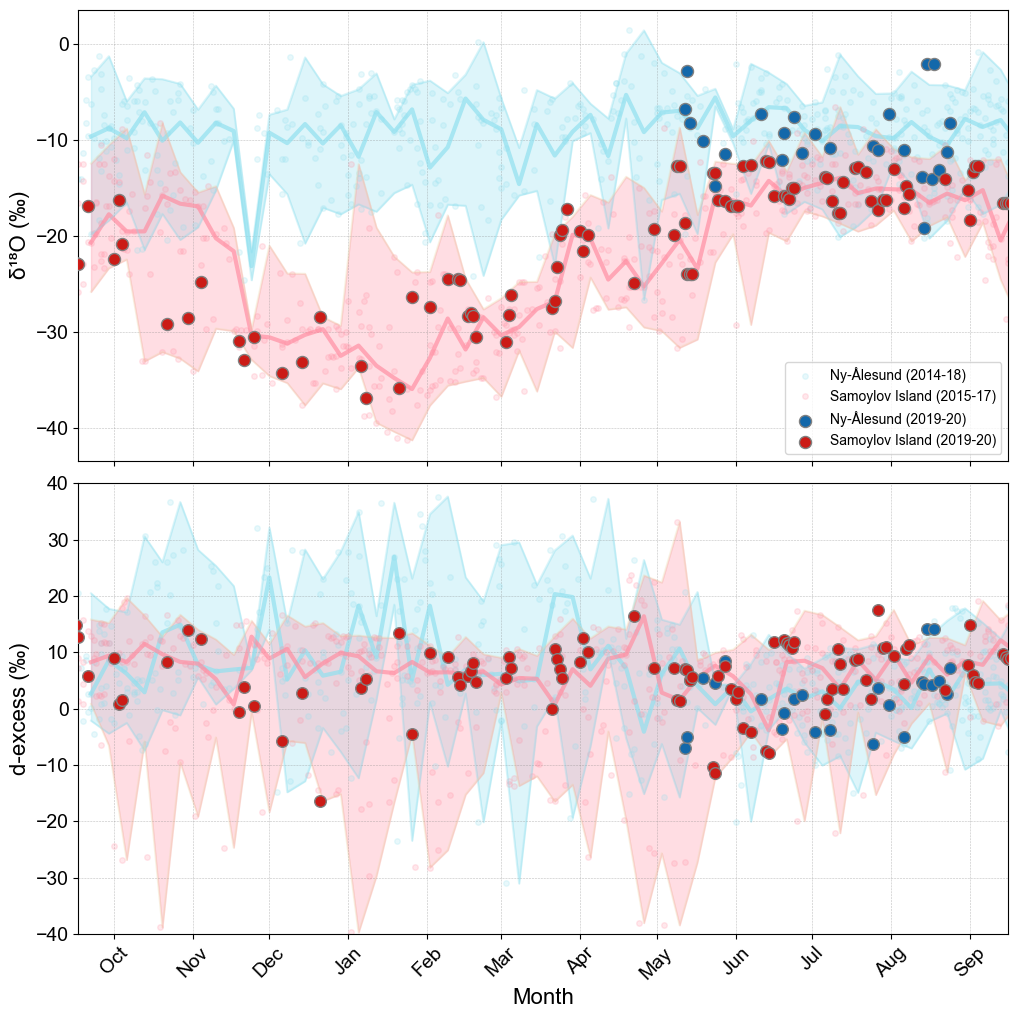

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

# Set the font to Arial
matplotlib.rcParams['font.family'] = 'Arial'

# Load the data from both files
file_path = "C:\\CiASOM\\Data\\Vapor Svalbard\\Svalbard_Precip_longterm.xlsx"
data = pd.read_excel(file_path)

file_path_1 = "C:\\CiASOM\\PhD\\07.Manuscripts\\#2.Snow Surface\\Precipitation_PAPIN\\CiASOM_Comparison\\Samoylov_fouryear_precip_201920.xlsx"
data_1 = pd.read_excel(file_path_1)

# Load additional data from the new file
additional_file_path = "C:\\CiASOM\\PhD\\07.Manuscripts\\#2.Snow Surface\\Precipitation_PAPIN\\PAPIN_CiASOM.xlsx"
additional_data = pd.read_excel(additional_file_path, sheet_name=["Ny-Ålesund", "Samoylov"])

# Extract relevant columns for Ny-Ålesund and Samoylov
ny_alesund_data = additional_data["Ny-Ålesund"]
samoylov_data = additional_data["Samoylov"]

# Ensure that 'Date' is a datetime object for both datasets
data['Date'] = pd.to_datetime(data['Date'])
data_1['Date'] = pd.to_datetime(data_1['Date'])
ny_alesund_data['Date'] = pd.to_datetime(ny_alesund_data['Date'])
samoylov_data['Date'] = pd.to_datetime(samoylov_data['Date'])

# Filter out points where d18O > 3 and d-excess < -25 for the first dataset
data = data[(data['d18O'] <= 3) & (data['d-excess'] >= -40)]

# Filter the data for the date range for both datasets
start_date = pd.to_datetime("2019-10-01")
end_date = pd.to_datetime("2020-09-30")
data = data[(data['Date'] >= start_date) & (data['Date'] <= end_date)]
data_1 = data_1[(data_1['Date'] >= start_date) & (data_1['Date'] <= end_date)]

# Filter data_1 to remove points with d-excess lower than -40
data_1 = data_1[(data_1['d-excess'] >= -40) & (data_1['Date'] >= start_date) & (data_1['Date'] <= end_date)]

# Resample data to weekly frequency and calculate min, max, and median for both datasets
weekly_data = data.set_index('Date').resample('W').agg({'d18O': ['min', 'max', 'median'], 'd-excess': ['min', 'max', 'median']})
weekly_data_1 = data_1.set_index('Date').resample('W').agg({'d18O': ['min', 'max', 'median'], 'd-excess': ['min', 'max', 'median']})

# Create the subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12), sharex=True)
plt.subplots_adjust(hspace=0.05)  # Adjust the vertical space (reduce hspace value)

# Add a title to the upper subplot
#ax1.set_title('Precipitation', fontsize=18)  # Add this line to set the title

# Plot d18O data and weekly stats for data
ax1.plot(data['Date'], data['d18O'], marker='o', markersize=4, linestyle='', color='#90E0EF', alpha=0.2, label='Ny-Ålesund (2014-18)')
ax1.plot(weekly_data.index, weekly_data['d18O']['min'], color='#90E0EF', alpha=0.3, zorder=4)
ax1.plot(weekly_data.index, weekly_data['d18O']['max'], color='#90E0EF', alpha=0.3, zorder=4)
ax1.plot(weekly_data.index, weekly_data['d18O']['median'], color='#90E0EF', alpha=0.7, linewidth=3)
ax1.fill_between(weekly_data.index, weekly_data['d18O']['min'], weekly_data['d18O']['max'], color='#90E0EF', alpha=0.3)

# Plot d18O data and weekly stats for data_1
ax1.plot(data_1['Date'], data_1['d18O'], marker='o', markersize=4, linestyle='', color='#FF8FA3', alpha=0.2, label='Samoylov Island (2015-17)')
ax1.plot(weekly_data_1.index, weekly_data_1['d18O']['min'], color='#E9D8A6', alpha=0.3, zorder=4)
ax1.plot(weekly_data_1.index, weekly_data_1['d18O']['max'], color='#E9D8A6', alpha=0.3, zorder=4)
ax1.plot(weekly_data_1.index, weekly_data_1['d18O']['median'], color='#FF8FA3', alpha=0.7, linewidth=3)
ax1.fill_between(weekly_data_1.index, weekly_data_1['d18O']['min'], weekly_data_1['d18O']['max'], color='#FF8FA3', alpha=0.3)

# Plot d-excess data and weekly stats for data
ax2.plot(data['Date'], data['d-excess'], marker='o', markersize=4, linestyle='', color='#90E0EF', alpha=0.2)
ax2.plot(weekly_data.index, weekly_data['d-excess']['min'], color='#90E0EF', alpha=0.3, zorder=4)
ax2.plot(weekly_data.index, weekly_data['d-excess']['max'], color='#90E0EF', alpha=0.3, zorder=4)
ax2.plot(weekly_data.index, weekly_data['d-excess']['median'], color='#90E0EF', alpha=0.7, linewidth=3)
ax2.fill_between(weekly_data.index, weekly_data['d-excess']['min'], weekly_data['d-excess']['max'], color='#90E0EF', alpha=0.3)

# Plot d-excess data and weekly stats for data_1
ax2.plot(data_1['Date'], data_1['d-excess'], marker='o', markersize=4, linestyle='', color='#FF8FA3', alpha=0.2)
ax2.plot(weekly_data_1.index, weekly_data_1['d-excess']['min'], color='#E9D8A6', alpha=0.3, zorder=4)
ax2.plot(weekly_data_1.index, weekly_data_1['d-excess']['max'], color='#E9D8A6', alpha=0.3, zorder=4)
ax2.plot(weekly_data_1.index, weekly_data_1['d-excess']['median'], color='#FF8FA3', alpha=0.7, linewidth=3)
ax2.fill_between(weekly_data_1.index, weekly_data_1['d-excess']['min'], weekly_data_1['d-excess']['max'], color='#FF8FA3', alpha=0.3)

# Limit the y-axis on the d-excess plot to values between +40 and -40
ax2.set_ylim(-40, 40)

# Add scatter plot for Ny-Ålesund and Samoylov data
ax1.scatter(ny_alesund_data['Date'], ny_alesund_data['Calibrated d(18_16) Mean'], color='#1368AA', s=75, edgecolor = 'grey', label='Ny-Ålesund (2019-20)', zorder=5)
ax1.scatter(samoylov_data['Date'], samoylov_data['Calibrated d(18_16) Mean'], color='#CB1B16', s=75, edgecolor = 'grey', label='Samoylov Island (2019-20)', zorder=5)

ax2.scatter(ny_alesund_data['Date'], ny_alesund_data['d-excess'], color='#1368AA', s=70, edgecolor = 'grey', label='Ny-Ålesund', zorder=5)
ax2.scatter(samoylov_data['Date'], samoylov_data['d-excess'], color='#CB1B16', s=70, edgecolor = 'grey', label='Samoylov', zorder=5)

ax1.set_ylabel('δ¹⁸O (‰)', fontsize=16)
ax1.tick_params(axis='y', labelsize=14)

# Set x-axis limits, labels, and title
ax2.set_xlim(start_date, end_date)
x_ticks = pd.date_range(start_date, end_date, freq='MS') + pd.Timedelta(days=14)
month_labels = ["Oct", "Nov", "Dec", "Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep"]
ax2.set_xticks(x_ticks)
ax2.set_xticklabels(month_labels, rotation=45, fontsize=20)
ax2.set_xlabel('Month', fontsize=16)

# Adding a legend to the upper subplot
ax1.legend(loc='best')

ax1.set_ylabel('δ¹⁸O (‰)', fontsize=24)
ax2.set_ylabel('d-excess (‰)', fontsize=24)
ax1.tick_params(axis='y', labelsize=20)
ax2.tick_params(axis='y', labelsize=20)

# Add grid lines with specified properties
for ax in [ax1, ax2]:
    ax.grid(True, which='both', linestyle='--', linewidth=0.4, color='grey', alpha=0.5)

# Define the path for saving the JPEG file
save_path = "C:\\CiASOM\\PhD\\07.Manuscripts\\#2.Snow Surface\\Precipitation_PAPIN\\Plots\\TS_Precip_Samoylov_Svalbard_04032024.jpg"

# Save the figure as a JPEG with 600 dpi resolution
plt.savefig(save_path, dpi=600, bbox_inches='tight')

plt.show()

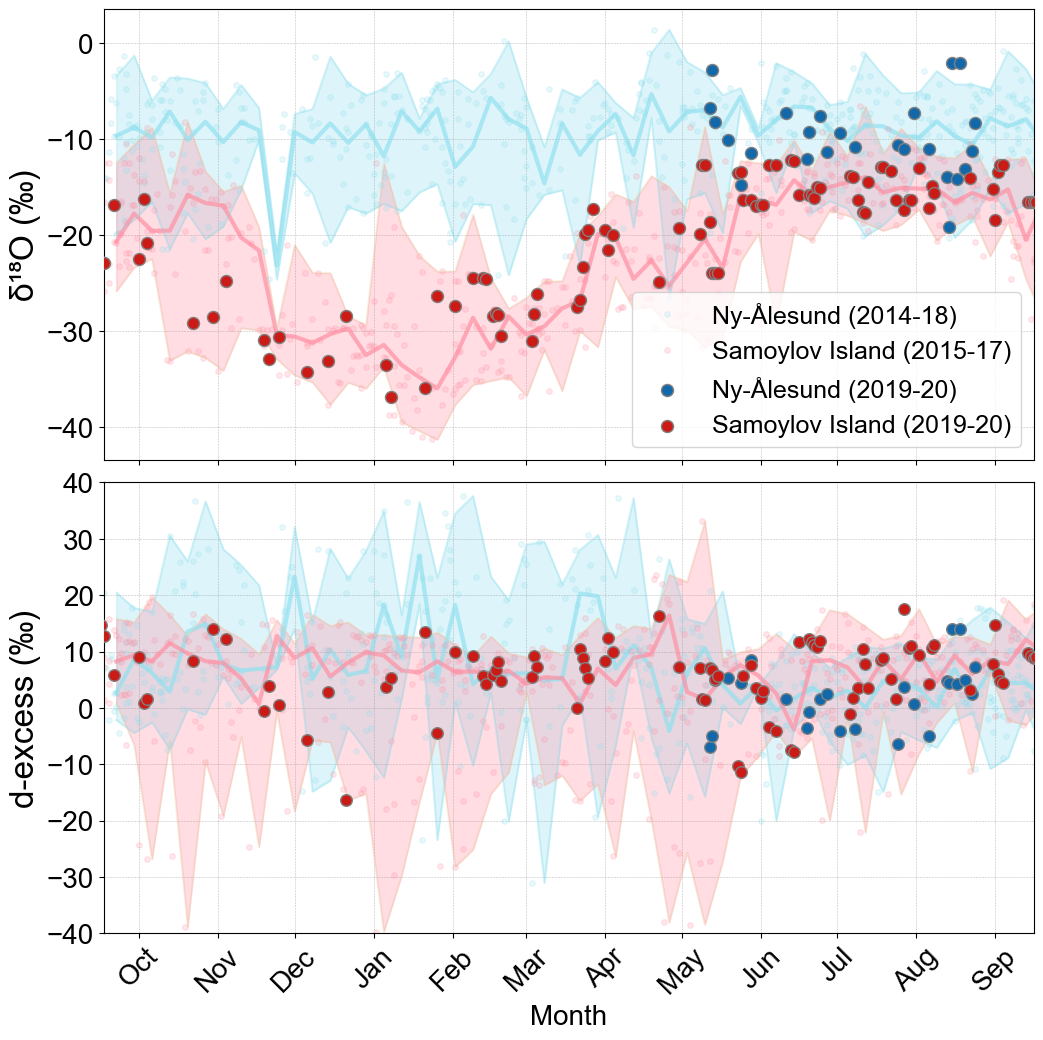

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

# Set the font to Arial
matplotlib.rcParams['font.family'] = 'Arial'

# Load the data from both files
file_path = "C:\\CiASOM\\Data\\Vapor Svalbard\\Svalbard_Precip_longterm.xlsx"
data = pd.read_excel(file_path)

file_path_1 = "C:\\CiASOM\\PhD\\07.Manuscripts\\#2.Snow Surface\\Precipitation_PAPIN\\CiASOM_Comparison\\Samoylov_fouryear_precip_201920.xlsx"
data_1 = pd.read_excel(file_path_1)

# Load additional data from the new file
additional_file_path = "C:\\CiASOM\\PhD\\07.Manuscripts\\#2.Snow Surface\\Precipitation_PAPIN\\PAPIN_CiASOM.xlsx"
additional_data = pd.read_excel(additional_file_path, sheet_name=["Ny-Ålesund", "Samoylov"])

# Extract relevant columns for Ny-Ålesund and Samoylov
ny_alesund_data = additional_data["Ny-Ålesund"]
samoylov_data = additional_data["Samoylov"]

# Ensure that 'Date' is a datetime object for both datasets
data['Date'] = pd.to_datetime(data['Date'])
data_1['Date'] = pd.to_datetime(data_1['Date'])
ny_alesund_data['Date'] = pd.to_datetime(ny_alesund_data['Date'])
samoylov_data['Date'] = pd.to_datetime(samoylov_data['Date'])

# Filter out points where d18O > 3 and d-excess < -25 for the first dataset
data = data[(data['d18O'] <= 3) & (data['d-excess'] >= -40)]

# Filter the data for the date range for both datasets
start_date = pd.to_datetime("2019-10-01")
end_date = pd.to_datetime("2020-09-30")
data = data[(data['Date'] >= start_date) & (data['Date'] <= end_date)]
data_1 = data_1[(data_1['Date'] >= start_date) & (data_1['Date'] <= end_date)]

# Filter data_1 to remove points with d-excess lower than -40
data_1 = data_1[(data_1['d-excess'] >= -40) & (data_1['Date'] >= start_date) & (data_1['Date'] <= end_date)]

# Resample data to weekly frequency and calculate min, max, and median for both datasets
weekly_data = data.set_index('Date').resample('W').agg({'d18O': ['min', 'max', 'median'], 'd-excess': ['min', 'max', 'median']})
weekly_data_1 = data_1.set_index('Date').resample('W').agg({'d18O': ['min', 'max', 'median'], 'd-excess': ['min', 'max', 'median']})

# Create the subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12), sharex=True)
plt.subplots_adjust(hspace=0.05)  # Adjust the vertical space (reduce hspace value)

# Add a title to the upper subplot
#ax1.set_title('Precipitation', fontsize=18)  # Add this line to set the title

# Plot d18O data and weekly stats for data
ax1.plot(data['Date'], data['d18O'], marker='o', markersize=4, linestyle='', color='#90E0EF', alpha=0.2, label='Ny-Ålesund (2014-18)')
ax1.plot(weekly_data.index, weekly_data['d18O']['min'], color='#90E0EF', alpha=0.3, zorder=4)
ax1.plot(weekly_data.index, weekly_data['d18O']['max'], color='#90E0EF', alpha=0.3, zorder=4)
ax1.plot(weekly_data.index, weekly_data['d18O']['median'], color='#90E0EF', alpha=0.7, linewidth=3)
ax1.fill_between(weekly_data.index, weekly_data['d18O']['min'], weekly_data['d18O']['max'], color='#90E0EF', alpha=0.3)

# Plot d18O data and weekly stats for data_1
ax1.plot(data_1['Date'], data_1['d18O'], marker='o', markersize=4, linestyle='', color='#FF8FA3', alpha=0.2, label='Samoylov Island (2015-17)')
ax1.plot(weekly_data_1.index, weekly_data_1['d18O']['min'], color='#E9D8A6', alpha=0.3, zorder=4)
ax1.plot(weekly_data_1.index, weekly_data_1['d18O']['max'], color='#E9D8A6', alpha=0.3, zorder=4)
ax1.plot(weekly_data_1.index, weekly_data_1['d18O']['median'], color='#FF8FA3', alpha=0.7, linewidth=3)
ax1.fill_between(weekly_data_1.index, weekly_data_1['d18O']['min'], weekly_data_1['d18O']['max'], color='#FF8FA3', alpha=0.3)

# Plot d-excess data and weekly stats for data
ax2.plot(data['Date'], data['d-excess'], marker='o', markersize=4, linestyle='', color='#90E0EF', alpha=0.2)
ax2.plot(weekly_data.index, weekly_data['d-excess']['min'], color='#90E0EF', alpha=0.3, zorder=4)
ax2.plot(weekly_data.index, weekly_data['d-excess']['max'], color='#90E0EF', alpha=0.3, zorder=4)
ax2.plot(weekly_data.index, weekly_data['d-excess']['median'], color='#90E0EF', alpha=0.7, linewidth=3)
ax2.fill_between(weekly_data.index, weekly_data['d-excess']['min'], weekly_data['d-excess']['max'], color='#90E0EF', alpha=0.3)

# Plot d-excess data and weekly stats for data_1
ax2.plot(data_1['Date'], data_1['d-excess'], marker='o', markersize=4, linestyle='', color='#FF8FA3', alpha=0.2)
ax2.plot(weekly_data_1.index, weekly_data_1['d-excess']['min'], color='#E9D8A6', alpha=0.3, zorder=4)
ax2.plot(weekly_data_1.index, weekly_data_1['d-excess']['max'], color='#E9D8A6', alpha=0.3, zorder=4)
ax2.plot(weekly_data_1.index, weekly_data_1['d-excess']['median'], color='#FF8FA3', alpha=0.7, linewidth=3)
ax2.fill_between(weekly_data_1.index, weekly_data_1['d-excess']['min'], weekly_data_1['d-excess']['max'], color='#FF8FA3', alpha=0.3)

# Limit the y-axis on the d-excess plot to values between +40 and -40
ax2.set_ylim(-40, 40)

# Add scatter plot for Ny-Ålesund and Samoylov data
ax1.scatter(ny_alesund_data['Date'], ny_alesund_data['Calibrated d(18_16) Mean'], color='#1368AA', s=75, edgecolor = 'grey', label='Ny-Ålesund (2019-20)', zorder=5)
ax1.scatter(samoylov_data['Date'], samoylov_data['Calibrated d(18_16) Mean'], color='#CB1B16', s=75, edgecolor = 'grey', label='Samoylov Island (2019-20)', zorder=5)

ax2.scatter(ny_alesund_data['Date'], ny_alesund_data['d-excess'], color='#1368AA', s=70, edgecolor = 'grey', label='Ny-Ålesund', zorder=5)
ax2.scatter(samoylov_data['Date'], samoylov_data['d-excess'], color='#CB1B16', s=70, edgecolor = 'grey', label='Samoylov', zorder=5)

ax1.set_ylabel('δ¹⁸O (‰)', fontsize=24)
ax1.tick_params(axis='y', labelsize=20)

# Set x-axis limits, labels, and title
ax2.set_xlim(start_date, end_date)
x_ticks = pd.date_range(start_date, end_date, freq='MS') + pd.Timedelta(days=14)
month_labels = ["Oct", "Nov", "Dec", "Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep"]
ax2.set_xticks(x_ticks)
ax2.set_xticklabels(month_labels, rotation=45, fontsize=20)
ax2.set_xlabel('Month', fontsize=20)

# Adding a legend to the upper subplot
ax1.legend(loc='best', fontsize=18)

ax1.set_ylabel('δ¹⁸O (‰)', fontsize=24)
ax2.set_ylabel('d-excess (‰)', fontsize=24)
ax1.tick_params(axis='y', labelsize=20)
ax2.tick_params(axis='y', labelsize=20)

# Add grid lines with specified properties
for ax in [ax1, ax2]:
    ax.grid(True, which='both', linestyle='--', linewidth=0.4, color='grey', alpha=0.5)

# Define the path for saving the JPEG fileData_Figures
save_path = "C:\\CiASOM\\PhD\\07.Manuscripts\\#2.Snow Surface\\Second Submission - Elementa\\Revisions\\Data_Figures\\TS_Precip_Samoylov_Svalbard_18052025.jpg"

# Save the figure as a JPEG with 600 dpi resolution
plt.savefig(save_path, dpi=600, bbox_inches='tight')

plt.show()